### Topics to be discussed.
- Mean, Median, Mode and their relationship ==> Skewed Right, symmetric, Skewed Left
- Range, verience, standard deviation
- Normal distribution and standard deviation (1 standard deviation of the mean- 68%, 2 standard deviation 95%, 3 standard deviation 99.7%...)
- Z-score (standard deviation 1, mean = 0, z-score= number of sd)
- Inter quatile range.
- Statistical testing (t-test, one way, two way)
- Correlation
- Hypotheis testing

### Problem 1: Mean, Median, Mode
A retail company wants to analyze the sales data of its top-selling product over the past year to gain insights into customer purchasing behavior. The company has collected daily sales data for this product and wants to understand the central tendency of sales figures. By calculating the mean, median, and mode of the sales data, the company aims to identify patterns, understand typical sales volumes, and detect any skewness or anomalies in the sales distribution. Generate the daily sales data for a year by yourself. Analyze the result.
- use daily_sales.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv('/Users/pc/Downloads/daily_sales.csv')

In [3]:
df1.head(10)

,Daily Sales
0,23
1,15
2,21
3,25
4,15
5,17
6,19
7,21
8,17
9,19


In [4]:
#mean
df1.mean()

Daily Sales    19.69589
dtype: float64

In [5]:
#median
df1.median()

Daily Sales    20.0
dtype: float64

In [6]:
#mode
df1.mode()

,Daily Sales
0,22


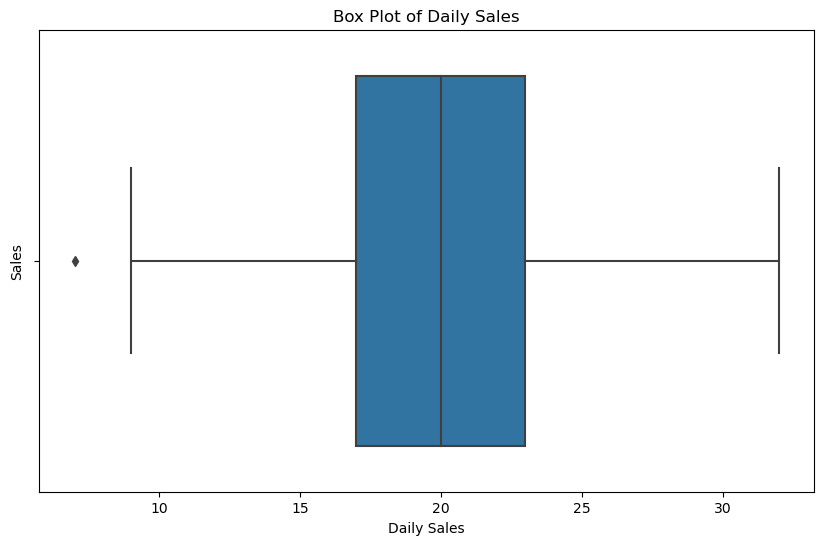

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['Daily Sales'])
plt.title('Box Plot of Daily Sales')
plt.ylabel('Sales')
plt.show()

### Problem 2: Data distribution and plots
You are tasked with analyzing the average monthly sales data of a retail store chain over the past year to determine if there has been a significant change in sales compared to the previous year. This analysis will help the store management understand the performance trends and plan future strategies accordingly. Load sales_data.csv.
- find mean sales
- find median sales
- find mode sales
- find skewness
- plot histogram
- density plot

In [8]:
df2=pd.read_csv('/Users/pc/Downloads/sales_data.csv')

In [9]:
df2.head()

,Month,Sales
0,2023-01-31,15292.157038
1,2023-02-28,11200.471625
2,2023-03-31,12936.213952
3,2023-04-30,16722.679598
4,2023-05-31,15602.673970


In [10]:
#mean
df2['Sales'].mean()

12244.63719635305

In [11]:
#skewness
df2['Sales'].skew()

-0.07734448027250686

Since the skew is negative so the data is **left_skewed**.

<BarContainer object of 12 artists>

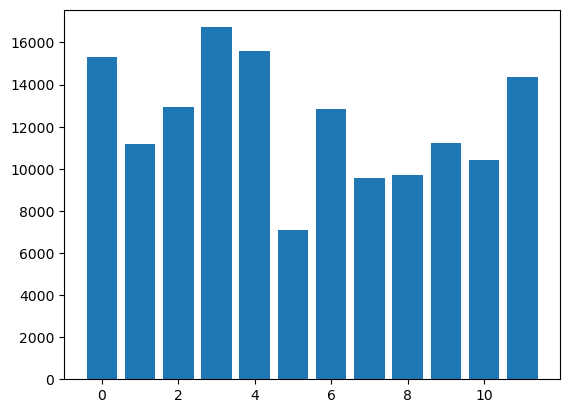

In [12]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.bar(df2.index,df2["Sales"])

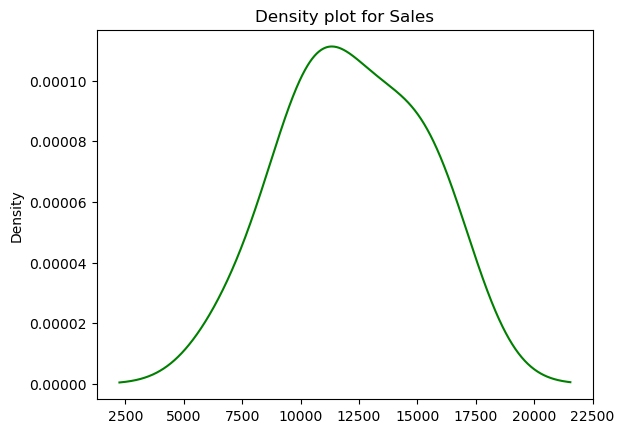

In [13]:
#densityplot
df2['Sales'].plot.density(color='green') 
plt.title('Density plot for Sales') 
plt.show()

### Problem 3: Outlier detection
A university wants to analyze the exam scores of a statistics class to identify any students whose scores are significantly different from the rest. Detecting outliers will help the university provide additional support to struggling students or recognize exceptionally high performers. The university decides to use both the Z-score and the Interquartile Range (IQR) methods to identify these outliers in the exam scores dataset.
- Generate the subject score for full mark 100 for 50 students.

Hints:
- Z-score is greater than 3.
- below - Q1−1.5×IQR or above Q3+1.5×IQR

In [14]:
np.random.seed(73)
no_of_student=50
# Generate random coffee sales data (between 50 and 300 cups)
marks = np.random.randint(1, 100, size=no_of_student)
print(marks)
student_id=np.linspace(1,50,no_of_student,dtype=int)
print(student_id)
data1 = {
    'Roll': student_id,
    'Marks': marks
}
df3 = pd.DataFrame(data1)

[23 19 47 11 17  9 68 66 39 72 98 54  8 53 44 54 47 68 51 63 68 86  2 64
 40 16 76 74 28 42 13 29 62 98 62 95 11 45 76 91 82 84 47 54 23 37 34 73
 40 54]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


In [15]:
df3.head()

,Roll,Marks
0,1,23
1,2,19
2,3,47
3,4,11
4,5,17


In [16]:
# Calculate Z-scores
df3['Z_score'] = (df3['Marks'] - df3['Marks'].mean()) / df3['Marks'].std()
df3.head()


,Roll,Marks,Z_score
0,1,23,-1.048328
1,2,19,-1.201704
2,3,47,-0.128069
3,4,11,-1.508457
4,5,17,-1.278392


In [17]:
# Threshold for Z-score outliers (absolute Z-score > 3)
z_score_threshold = 3

# Identify outliers based on Z-score
df3['Z_score_outlier'] = (np.abs(df3['Z_score']) > z_score_threshold)
df3.head()

,Roll,Marks,Z_score,Z_score_outlier
0,1,23,-1.048328,False
1,2,19,-1.201704,False
2,3,47,-0.128069,False
3,4,11,-1.508457,False
4,5,17,-1.278392,False


In [18]:
# Calculate IQR
q1 = df3['Marks'].quantile(0.25)
q3 = df3['Marks'].quantile(0.75)
iqr = q3 - q1

# Define the outlier bounds using IQR
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers based on IQR
df3['IQR_outlier'] = (df3['Marks'] < lower_bound) | (df3['Marks'] > upper_bound)
df3.sample(15)


,Roll,Marks,Z_score,Z_score_outlier,IQR_outlier
14,15,44,-0.243102,False,False
4,5,17,-1.278392,False,False
24,25,40,-0.396478,False,False
15,16,54,0.140339,False,False
49,50,54,0.140339,False,False
21,22,86,1.367350,False,False
10,11,98,1.827480,False,False
7,8,66,0.600469,False,False
42,43,47,-0.128069,False,False
34,35,62,0.447092,False,False


### Problem 4: t-test for ML models
Your task is to write Python code to perform t-tests on the testing results of five different machine learning algorithms. First, generate testing results for each of the five models, with each model having results for 50 test sets. Then, using these generated results, conduct t-tests to compare the results of the first model with those of each of the remaining four models. The goal is to determine if there is a statistically significant difference between the performance of the first model and each of the other models. Finally, print the results of each t-test, which will include the t-statistic and p-value for each comparison. And analyze the result whether the methods are statistically significant or not. What does it mean?

In [19]:
import numpy as np 
import pandas as pd
np.random.seed(42)
num_test=5
num_sample=50
sample={}
for i in range(num_test):
  model_name=f"model_{i+1}"
  sample[model_name]=np.random.rand(num_sample)*100

sample_df=pd.DataFrame(sample)


In [20]:
from scipy import stats
model_1name='model_1'
t_test_result={}
for model_name in sample_df.columns:
  if model_name!=model_1name:
    t_value,p_value=stats.ttest_ind(sample_df[model_1name],sample_df[model_name])
    t_test_result[model_name] = {'t-statistic': t_value, 'p-value': p_value}
t_result_df=pd.DataFrame(t_test_result)
print(t_result_df)


              model_2   model_3   model_4   model_5
t-statistic -0.813994 -0.552033 -1.233453 -1.171967
p-value      0.417622  0.582182  0.220357  0.244051


Based on the t-test results comparing the performance of Model 1 with Models 2, 3, 4, and 5, we conclude that there are no statistically significant differences in performance between Model 1 and the other models. 

The t-test results show that the p-values for comparing Model 1 with Models 2, 3, 4, and 5 are all above 0.05 (0.417622, 0.582182, 0.220357, and 0.244051, respectively). This means there is no statistically significant difference between Model 1 and the other models. Any differences in performance are likely due to chance, so we can say that Model 1 performs similarly to Models 2, 3, 4, and 5.

### Problem 5: Correlation Analysis
- A coffee shop owner wants to determine whether there is a relationship between the amount of coffee sold and the temperature outside. The owner collects data on the number of cups of coffee sold and the temperature outside for 20 days.
- Download mtcars.csv file and perform the correlation analysis. See the result and analyze it. Also plot the heatmap for it.

In [22]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate the number of days
num_days = 20

# Generate random coffee sales data (between 50 and 300 cups)
coffee_sales = np.random.randint(50, 301, size=num_days)

# Generate random temperature data (between -10 and 35 degrees Celsius)
temperature = np.random.uniform(-10, 35, size=num_days)

# Create the DataFrame
data = {
    'Day': pd.date_range(start='2023-01-01', periods=num_days, freq='D'),
    'Coffee_Sales': coffee_sales,
    'Temperature': temperature
}
df5a = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df5a.head())

         Day  Coffee_Sales  Temperature
0 2023-01-01           152    -9.073698
1 2023-01-02           229    33.645943
2 2023-01-03           142    27.459919
3 2023-01-04            64    -0.444740
4 2023-01-05           156    -1.817876


In [23]:
df5a['Coffee_Sales'].corr(df5a["Temperature"])

0.14102504148614803

This indicate a small degree of positive correlation between Coffee sales and Temperature.

In [24]:
df5=pd.read_csv('/Users/pc/Downloads/mtcars.csv')

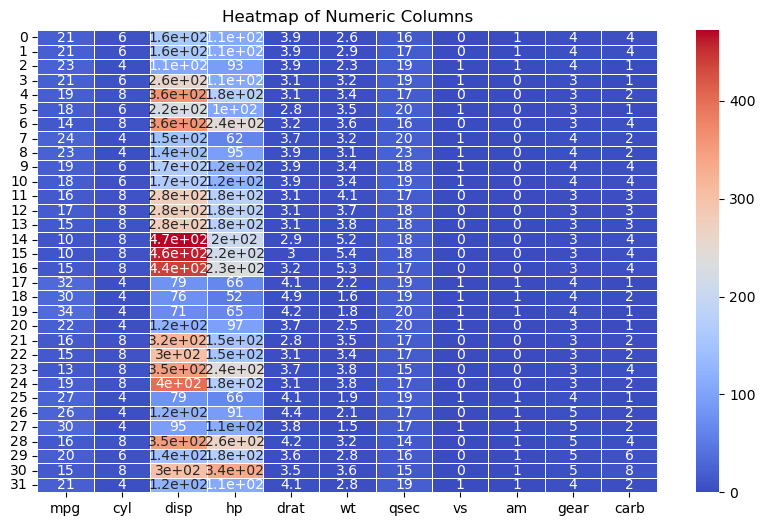

In [25]:
#heatmap
# Select only numeric columns
numeric_df = df5.select_dtypes(include=[np.number])
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Numeric Columns')
plt.show()


### Problem 6: Hypothesis testing
Imagine a company, samsung, that manufactures a popular smartphone. They have introduced a new battery designed to last longer than the previous model, which had an average battery life of 10 hours. To determine if the new battery indeed lasts longer, samsung conducts a study where they test 30 smartphones with the new battery and record their battery life. The goal is to test the hypothesis that the mean battery life of the new batteries is greater than 10 hours using a one-tailed test.

Hypothesis:
- Null Hypothesis (H₀): The mean battery life of the new battery is 10 hours.
- Alternative Hypothesis (H₁): The mean battery life of the new battery is greater than 10 hours.

In [26]:
import numpy as np
np.random.seed(42)
num=30
assumed_mean=10
#loc for mean.scale for standard deviation
test_sample=np.random.normal(loc=15,scale=2,size=num)
print(test_sample)
observed_mean=np.mean(test_sample)
standard_dev=np.std(test_sample)
t=(observed_mean-assumed_mean)/(standard_dev/np.sqrt(num))
print(f"The t value is : {t}")


[15.99342831 14.7234714  16.29537708 18.04605971 14.53169325 14.53172609
 18.15842563 16.53486946 14.06105123 16.08512009 14.07316461 14.06854049
 15.48392454 11.17343951 11.55016433 13.87542494 12.97433776 15.62849467
 13.18395185 12.1753926  17.93129754 14.5484474  15.13505641 12.15050363
 13.91123455 15.22184518 12.69801285 15.75139604 13.79872262 14.4166125 ]
The t value is : 14.309909271303232


# Finding the critical value from the t_table

In [27]:
#alpha=0.05
#degree=30-1=29
critical_value = 1.699
if(t > critical_value):
    print("Null Hypothesis is rejected! Battery life has signifiantly improved.")
else:
    print("Null Hypothesis is accepted! Battery life has no significant improvement.")

Null Hypothesis is rejected! Battery life has signifiantly improved.


## Summarizing categorical variables

1. Frequency table
	1. Value count of blood type
	2. Value count of gender
	3. Value count as proportions
2. Contengency table
	1. Cross table of bloodtype and gender
	2. explore margins
3.
## Interval Estimation of the Proportion

```
HINT: explore st.norm.interval
```

1.  There are two candidates for the election: A and B.
The candidate A wants to survey his approval rating.
Out of 100 suerveyed, 55 answered positively.
Can A be sure of this election?
- Assume that A gets elected with 50% or more.
- Use 95% confidence interval.



2. Out of 1000 suerveyed, 550 answered positively. Can A be sure of this election?
- Assume that A gets elected with 50% or more.
- Use 95% confidence interval.


### How can we know that the three groups are same or different?

- There are three groups of students. The data corresponds to the test scores. Determine whether there is any significant difference in the group test scores.
```python
# Data
x1 = np.array([82,93,61,74,69,70,53])
x2 = np.array([71,62,85,94,78,66,71])
x3 = np.array([64,73,87,91,56,78,87])
```


# Question 1

In [28]:
#NUllHypothesi h0: p>=0.5
#h1:p<=0.5
sample_no=100
success=55
sample_prop=success/sample_no
pop_prop=0.5 
z_calc=(sample_prop-pop_prop)/np.sqrt(pop_prop*((1-pop_prop)/sample_no))
print(z_calc)

1.0000000000000009


In [29]:
z_value=1.96
if z_calc>z_value:
  print("Null hypothesis is accepted.A will win the election")
else:
  print("Null hypothesis is rejected.A is not sure to win the election")

Null hypothesis is rejected.A is not sure to win the election


# Using st.norm.interval

In [30]:
import scipy.stats as st
sample_no=100
success=55
sample_prop=success/sample_no
c_l=0.95
standard_error=np.sqrt(pop_prop*((1-pop_prop)/sample_no))
c_i=st.norm.interval(c_l,loc=sample_prop,scale=standard_error)
print(c_i)

(0.45200180077299734, 0.6479981992270027)


In [31]:
if c_i[0]>0.5:
  print("The candidate A will win the election.")
else:
    print("The candidate A is not sure to  win the election.")


The candidate A is not sure to  win the election.


# Question 2

In [32]:
#NUllHypothesi h0: p>=0.5
#h1:p<=0.5
sample_no=1000
success=550
sample_prop=success/sample_no
pop_prop=0.5 
z_calc=(sample_prop-pop_prop)/np.sqrt(pop_prop*((1-pop_prop)/sample_no))
print(z_calc)

3.162277660168382


In [33]:
z_value=1.96
if z_calc>z_value:
  print("Null hypothesis is accepted.A will win the election")
else:
  print("Null hypothesis is rejected.A is not sure to win the election")

Null hypothesis is accepted.A will win the election


# Using st.norm.interval

In [34]:
import scipy.stats as st
sample_no=1000
success=550
sample_prop=success/sample_no
c_l=0.95
standard_error=np.sqrt(pop_prop*((1-pop_prop)/sample_no))
c_i=st.norm.interval(c_l,loc=sample_prop,scale=standard_error)
print(c_i)

(0.5190102483847719, 0.5809897516152281)


In [35]:
if c_i[0]>0.5:
  print("The candidate A will win the election.")
else:
    print("The candidate A is not sure to  win the election.")

The candidate A will win the election.


# Question 3

In [36]:
x1 = np.array([82,93,61,74,69,70,53])
x2 = np.array([71,62,85,94,78,66,71])
x3 = np.array([64,73,87,91,56,78,87])

In [37]:
# Perform one-way ANOVA
statistic, p_value = st.f_oneway(x1, x2, x3)

# Print the results
print(f"One-way ANOVA Results:")
print(f"  F-statistic: {statistic:.4f}")
print(f"  p-value: {p_value:.4f}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("There is significant evidence to reject the null hypothesis.")
    print("There is a significant difference in the group test scores.")
else:
    print("There is not enough evidence to reject the null hypothesis.")
    print("There is no significant difference in the group test scores.")

One-way ANOVA Results:
  F-statistic: 0.2837
  p-value: 0.7563
There is not enough evidence to reject the null hypothesis.
There is no significant difference in the group test scores.


Based on the output of the ANOVA test, if the p-value is less than 0.05, we would conclude that there is a significant difference in the test scores between the three groups of students. If the p-value is greater than 0.05, we would conclude that there is no significant difference in the test scores between the groups.